In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('datasets/1/train.csv')

In [10]:
df = pd.DataFrame(df[df['store'] == 0])
df = pd.DataFrame(df[df['product'] == 0])

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
x = pd.to_timedelta(np.diff(df['Date']).min())

In [12]:
x

Timedelta('1 days 00:00:00')

<Axes: >

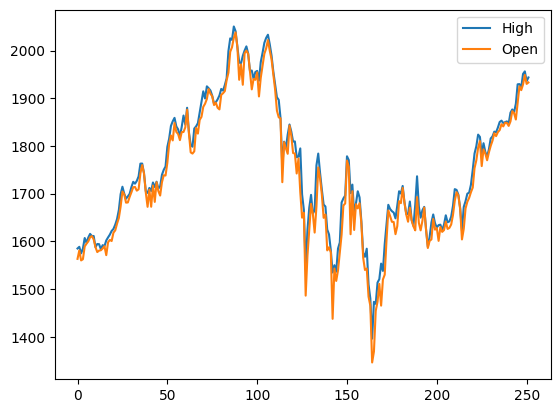

In [5]:
df[['High', 'Open']].plot()

In [8]:
from tsa.interpolation import interpolate_dates as interpolate

new_df = interpolate(df, 'Date', ['High', 'Open'], interval=x)